In [1]:
import requests
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from matplotlib.pyplot import figure

# cd documents/nss/projects/Python/music_matters/Notebooks

## Made a dataframe to show how many requests I would need per city so I wouldn't run out of requests in the middle of getting data from one city. 

In [2]:
data={'Cities':['New York', 'Nashville', 'Austin', 'Los Angeles', 'Chicago', 
           'Las Vegas', 'Denver', 'San Fransicso', 'Seattle', 'Portland'], 
 'States': ['NY', 'TN', 'TX', 'CA', 'IL', 'NV', 'CO', 'CA', 'WA', 'OR'], 
      'Number of Setlists':[8155, 2225, 4369, 8021, 5683, 4327, 3063, 2565, 3186, 2362]}


df=pd.DataFrame(data)

df['Number of Requests']=df['Number of Setlists']/20
df

,Cities,States,Number of Setlists,Number of Requests
0,New York,NY,8155,407.75
1,Nashville,TN,2225,111.25
2,Austin,TX,4369,218.45
3,Los Angeles,CA,8021,401.05
4,Chicago,IL,5683,284.15
5,Las Vegas,NV,4327,216.35
6,Denver,CO,3063,153.15
7,San Fransicso,CA,2565,128.25
8,Seattle,WA,3186,159.30
9,Portland,OR,2362,118.10


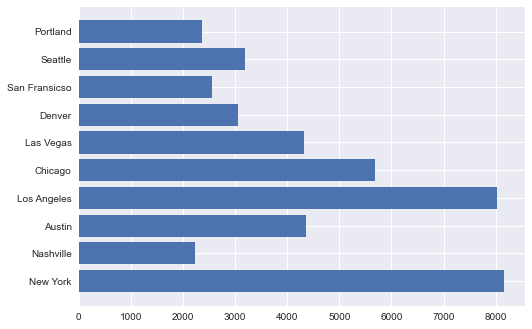

In [3]:
# US cities
plt.barh(df['Cities'],df['Number of Setlists'])
plt.show()

In [4]:
non_us_cities = {'Cities': ['London', 'Paris', 'Toronto', 'Buenos Aires', 'Manchester', 'Brussels', 'Berlin', 'Barcelona', 'Amsterdam', 'Antwerp'], 
        'Country_Code': ['GB', 'FR', 'CA', 'AR', 'GB', 'BE', 'DE','ES', 'NL', 'BE'], 
        'Number of Setlists':[8409,3791,3788,3480,3059,2634,2504,2417,2235,2215]      
       }

non_us_cities_df=pd.DataFrame(non_us_cities)

non_us_cities_df['Number of Requests']=non_us_cities_df['Number of Setlists']/20
non_us_cities_df

,Cities,Country_Code,Number of Setlists,Number of Requests
0,London,GB,8409,420.45
1,Paris,FR,3791,189.55
2,Toronto,CA,3788,189.40
3,Buenos Aires,AR,3480,174.00
4,Manchester,GB,3059,152.95
5,Brussels,BE,2634,131.70
6,Berlin,DE,2504,125.20
7,Barcelona,ES,2417,120.85
8,Amsterdam,NL,2235,111.75
9,Antwerp,BE,2215,110.75


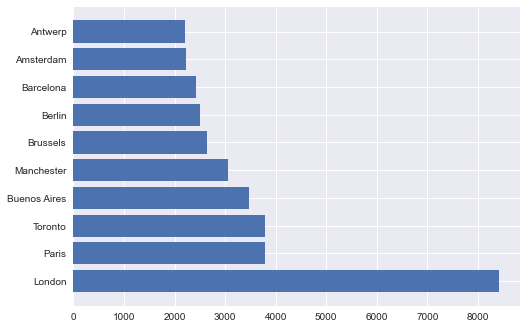

In [5]:
plt.barh(non_us_cities_df['Cities'],non_us_cities_df['Number of Setlists'])
plt.show()

## Imported dataframes from each city saved in excel so I wouldn't have to make API requests each time I ran the kernel. And because my request limit of 1440/day wouldn't allow for all the data to be obtained in one day.

In [6]:
portland=pd.read_excel('../Data/music_matters_portland.xlsx')
portland['city'].value_counts()

Portland        11641
Troutdale         665
Happy Valley      296
Forest Grove      131
Beaverton          37
West Linn          16
Name: city, dtype: int64

Realized that by Portland, they also included concerts from the surrounding area. Decided to only focus on concerts in the proper city area. 

In [7]:
portland = portland[portland['city']=='Portland']
portland['city'].value_counts()

Portland    11641
Name: city, dtype: int64

In [8]:
seattle=pd.read_excel('../Data/music_matters_seattle.xlsx')
seattle = seattle[seattle['city']=='Seattle']

In [9]:
nashville=pd.read_excel('../Data/music_matters_nashville.xlsx')
nashville = nashville[nashville['city']=='Nashville']

In [10]:
new_york=pd.read_excel('../Data/music_matters_new_york.xlsx')
new_york = new_york[new_york['city']=='New York']

In [11]:
los_angeles =pd.read_excel('../Data/music_matters_los_angeles.xlsx')
los_angeles = los_angeles[los_angeles['city']=='Los Angeles']

In [12]:
austin =pd.read_excel('../Data/music_matters_austin.xlsx')
austin = austin[austin['city']=='Austin']

In [13]:
chicago =pd.read_excel('../Data/music_matters_chicago.xlsx')
chicago = chicago[chicago['city']=='Chicago']

In [14]:
denver =pd.read_excel('../Data/music_matters_denver.xlsx')
denver = denver[denver['city']=='Denver']

In [15]:
las_vegas =pd.read_excel('../Data/music_matters_las_vegas.xlsx')
las_vegas = las_vegas[las_vegas['city']=='Las Vegas']

In [16]:
san_francisco =pd.read_excel('../Data/music_matters_san_francisco.xlsx')
san_francisco = san_francisco[san_francisco['city']=='San Francisco']

## Non US Cities

In [17]:
paris =pd.read_excel('../Data/music_matters_paris.xlsx')
paris = paris[paris['city']=='Paris']

In [18]:
toronto =pd.read_excel('../Data/music_matters_toronto.xlsx')
toronto = toronto[toronto['city']=='Toronto']

In [19]:
manchester =pd.read_excel('../Data/music_matters_manchester.xlsx')
manchester = manchester[manchester['city']=='Manchester']

In [20]:
london =pd.read_excel('../Data/music_matters_london.xlsx')
london = london[london['city']=='London']

In [21]:
buenos_aires =pd.read_excel('../Data/music_matters_buenos_aires.xlsx')
buenos_aires = buenos_aires[buenos_aires['city']=='Buenos Aires']

In [22]:
berlin =pd.read_excel('../Data/music_matters_berlin.xlsx')
berlin = berlin[berlin['city']=='Berlin']

In [23]:
brussels =pd.read_excel('../Data/music_matters_brussels.xlsx')
brussels = brussels[brussels['city']=='Brussels']

In [24]:
barcelona =pd.read_excel('../Data/music_matters_barcelona.xlsx')
barcelona= barcelona[barcelona['city']=='Barcelona']

In [25]:
amsterdam =pd.read_excel('../Data/music_matters_amsterdam.xlsx')
amsterdam = amsterdam[amsterdam['city']=='Amsterdam']

In [26]:
antwerp =pd.read_excel('../Data/music_matters_antwerp.xlsx')
antwerp = antwerp[antwerp['city']=='Antwerp']

## Concatenated all city dataframes together into one big dataframe

In [27]:
concat = pd.concat([new_york, nashville, seattle, portland, los_angeles, chicago, austin, denver, las_vegas, san_francisco, paris, toronto, manchester, london, brussels, berlin, barcelona, buenos_aires, amsterdam, antwerp], ignore_index=True)

## Removed the band ABBA Voyage (virtual performances by 'Abbatars')

In [28]:
concat = concat[concat['artist']!='ABBA Voyage']

## Made a new column that showed whether song was an original or a cover

In [29]:
concat['original_vs_cover'] = np.where(concat['cover']=='original', 'Original', 'Cover')

## Fixed 'traditional' title

In [30]:
# pumpkins['type'] = pumpkins['type'].replace(['F'], 'Field Pumpkin')

concat['cover']=concat['cover'].replace(['[traditional]'], 'Traditional')
concat['cover'].value_counts().head(10)

original         286523
The Beatles         813
Pink Floyd          646
Grateful Dead       464
David Bowie         359
Traditional         349
Queen               325
Talking Heads       256
Bob Dylan           250
Led Zeppelin        249
Name: cover, dtype: int64

## Subsetted dataframe to look at only covers

In [31]:
covers = concat[concat['original_vs_cover']=='Cover']

## Subsetted US cities vs non-US cities

In [32]:
us=concat[concat['country']=='United States']
non_us = concat[concat['country']!='United States']

## Further subsetted to look at US cities vs non-US cities

In [33]:
us_covers = us[us['original_vs_cover']=='Cover']
non_us_covers = non_us[non_us['original_vs_cover']=='Cover']

In [34]:
us_covers['song'].value_counts().nlargest(10).sort_values(ascending=False)

Happy Birthday to You                    48
Creep                                    38
Once in a Lifetime                       37
This Must Be the Place (Naive Melody)    32
Another Brick in the Wall, Part 2        31
Time                                     30
What Makes You Beautiful                 28
Mr. Brightside                           27
Dreams                                   25
Cover Me Up                              23
Name: song, dtype: int64

# Visuals

([<matplotlib.axis.XTick at 0x186e0d0bd30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

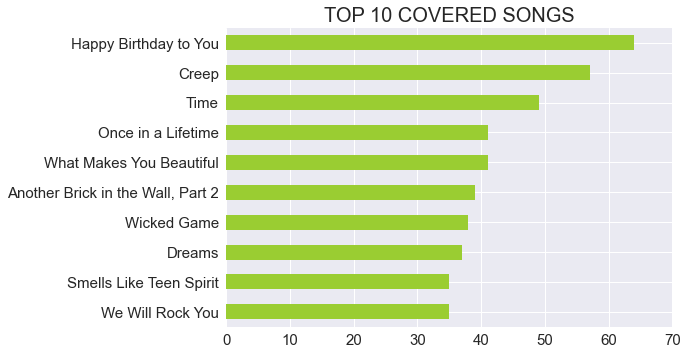

In [35]:
covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='',color='yellowgreen',legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED SONGS',fontsize=20)

tick_val = [0,10,20,30,40,50,60,70]
plt.xticks(tick_val)

([<matplotlib.axis.XTick at 0x186e1233cd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

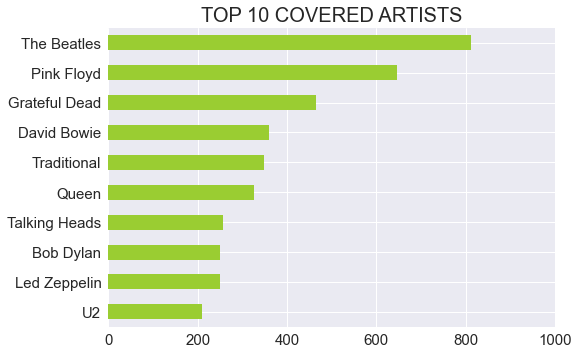

In [36]:
covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', color='yellowgreen',fontsize=15)
plt.title('TOP 10 COVERED ARTISTS',fontsize=20)

tick_val = [0,200,400,600,800,1000]
plt.xticks(tick_val)

([<matplotlib.axis.XTick at 0x186ddc85100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

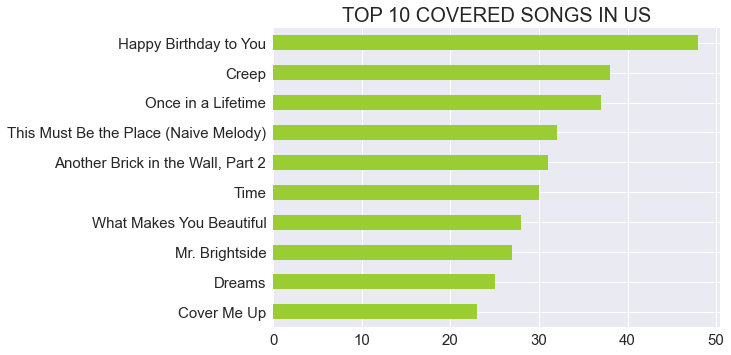

In [37]:
us_covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='',color='yellowgreen', legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED SONGS IN US',fontsize=20)

tick_val = [0,10,20,30,40,50]
plt.xticks(tick_val)


([<matplotlib.axis.XTick at 0x186e1899d60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

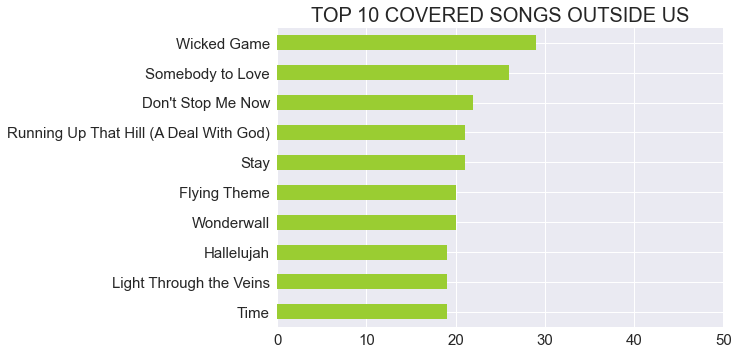

In [38]:
non_us_covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', color='yellowgreen', legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED SONGS OUTSIDE US',fontsize=20)

tick_val = [0,10,20,30,40,50]
plt.xticks(tick_val)



([<matplotlib.axis.XTick at 0x186e1182940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

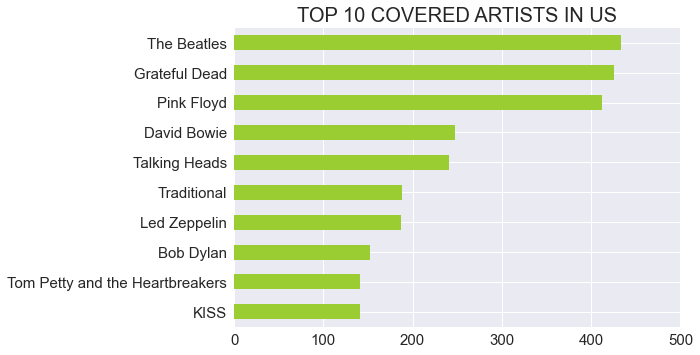

In [39]:
us_covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', color='yellowgreen', legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED ARTISTS IN US',fontsize=20)

tick_val = [0,100,200,300,400,500]
plt.xticks(tick_val)

([<matplotlib.axis.XTick at 0x186e13c9ca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

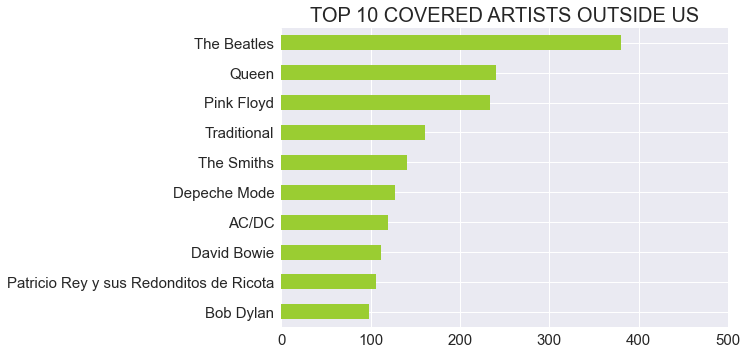

In [40]:


non_us_covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', color='yellowgreen',legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED ARTISTS OUTSIDE US',fontsize=20)

#plt.tight_layout()
tick_val = [0,100,200,300,400,500]
plt.xticks(tick_val)


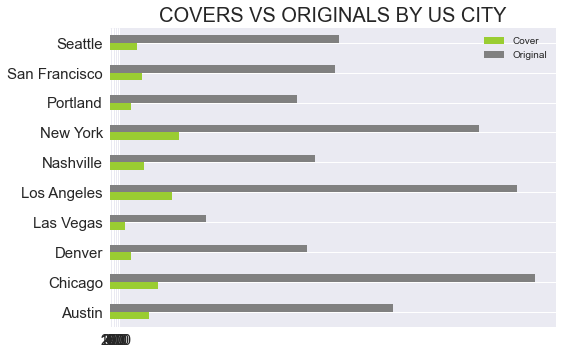

In [41]:
us.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', color=['yellowgreen', 'grey'],legend=False, ylabel='', fontsize=15)

plt.title('COVERS VS ORIGINALS BY US CITY',fontsize=20)
plt.legend(title = '')
plt.xticks(tick_val)
tick_val = [0,10000,20000,30000,40000,50000]

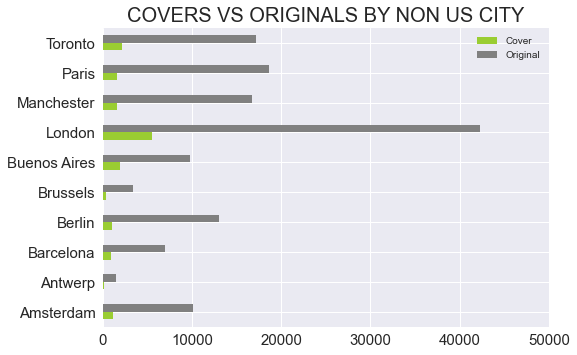

In [42]:
non_us.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='',color=['yellowgreen', 'grey'], legend=True,ylabel='', fontsize=15)

plt.title('COVERS VS ORIGINALS BY NON US CITY',fontsize=20)
plt.legend(title = '')
plt.xticks(tick_val)
tick_val = [0,10000,20000,30000,40000,50000]

# Analyzed proportion of covers to originals by US city

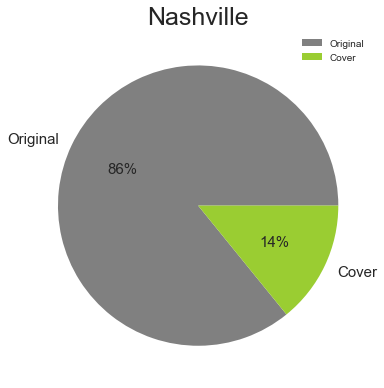

In [43]:
nashville = concat[concat['city']=='Nashville']

nashville['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Nashville',fontsize=25)
plt.tight_layout()

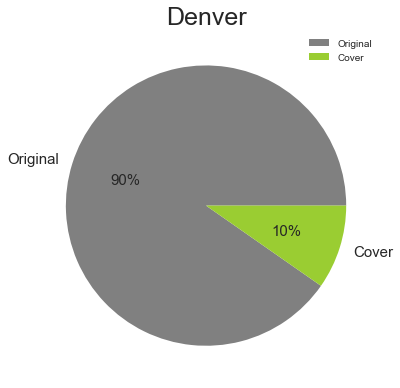

In [44]:
denver = concat[concat['city']=='Denver']

denver['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Denver',fontsize=25)
plt.tight_layout()

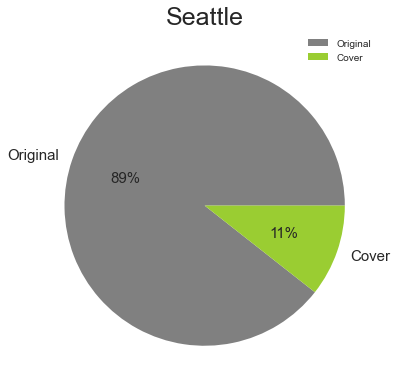

In [45]:
seattle = concat[concat['city']=='Seattle']

seattle['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Seattle',fontsize=25)
plt.tight_layout()

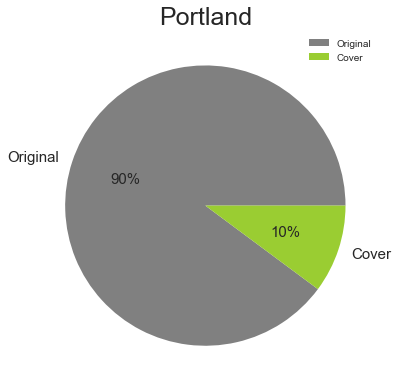

In [46]:
portland = concat[concat['city']=='Portland']

portland['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Portland',fontsize=25)
plt.tight_layout()

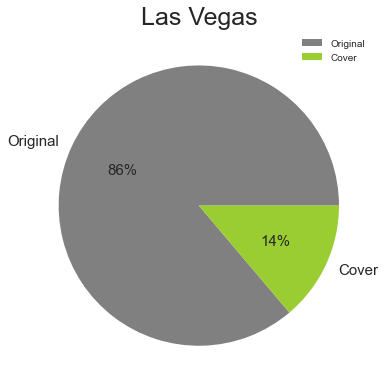

In [47]:
las_vegas = concat[concat['city']=='Las Vegas']

las_vegas['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Las Vegas',fontsize=25)
plt.tight_layout()

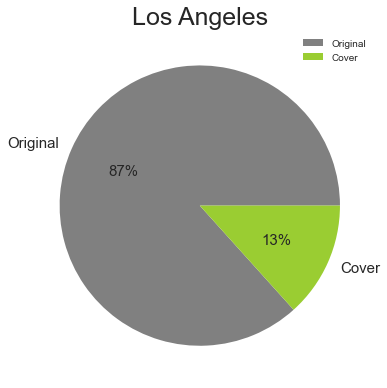

In [48]:
los_angeles = concat[concat['city']=='Los Angeles']

los_angeles['original_vs_cover'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Los Angeles',fontsize=25)
plt.tight_layout()

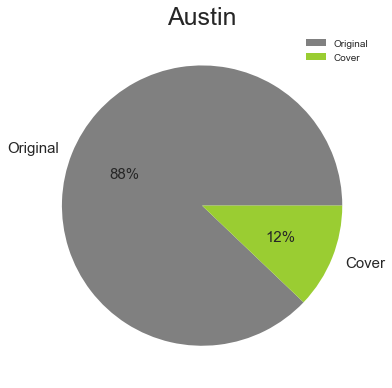

In [49]:
austin = concat[concat['city']=='Austin']

austin['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Austin',fontsize=25)
plt.tight_layout()

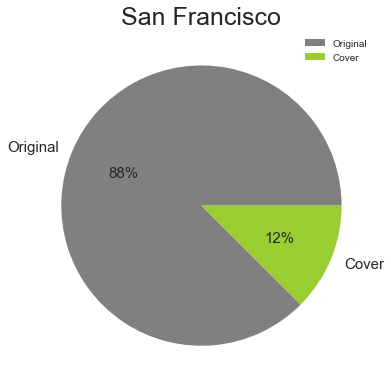

In [50]:
san_francisco = concat[concat['city']=='San Francisco']

san_francisco['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('San Francisco',fontsize=25)
plt.tight_layout()

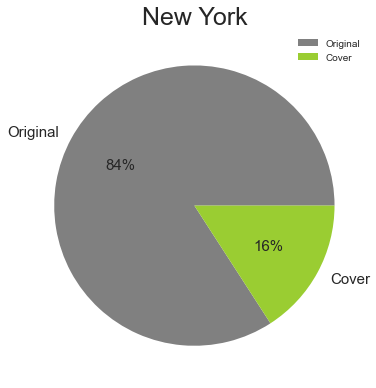

In [51]:
new_york = concat[concat['city']=='New York']

new_york['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('New York',fontsize=25)
plt.tight_layout()

# Analyzed proportion of covers to originals by non-US city

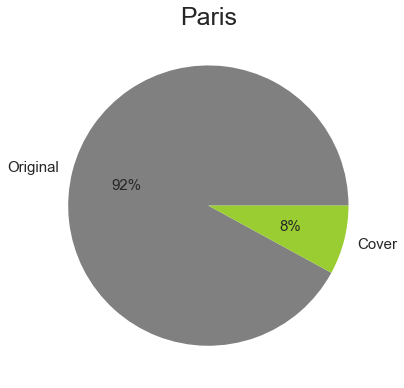

In [52]:
paris = concat[concat['city']=='Paris']
paris['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Paris',fontsize=25)
plt.tight_layout()

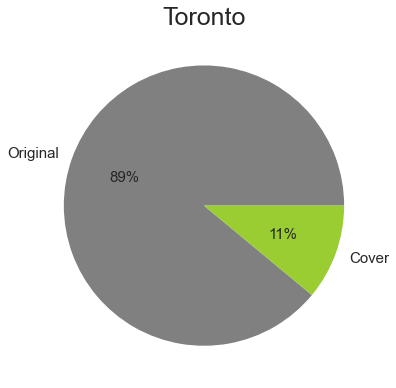

In [53]:
toronto = concat[concat['city']=='Toronto']
toronto['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Toronto',fontsize=25)
plt.tight_layout()

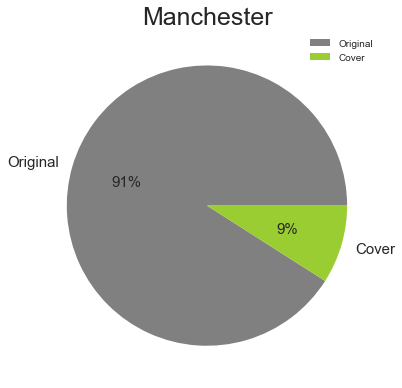

In [54]:
manchester = concat[concat['city']=='Manchester']
manchester['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Manchester',fontsize=25)
plt.tight_layout()

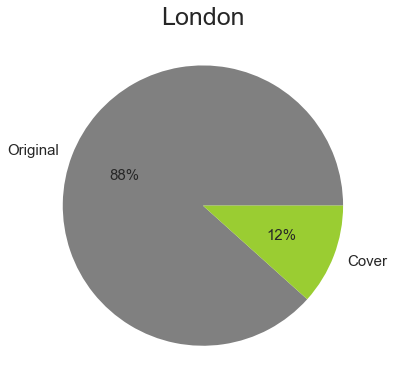

In [55]:
london = concat[concat['city']=='London']
london['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('London',fontsize=25)
plt.tight_layout()

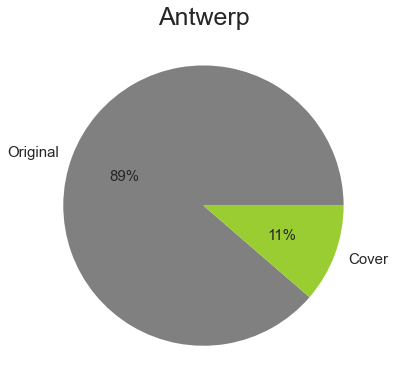

In [56]:
antwerp = concat[concat['city']=='Antwerp']
antwerp['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Antwerp',fontsize=25)
plt.tight_layout()

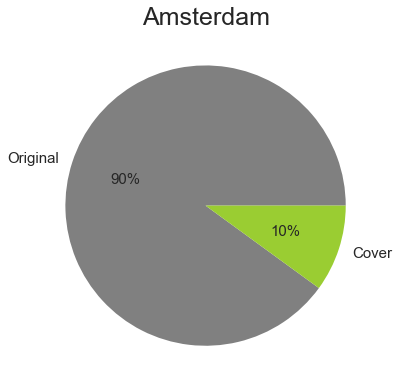

In [57]:
amsterdam = concat[concat['city']=='Amsterdam']
amsterdam['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Amsterdam',fontsize=25)
plt.tight_layout()

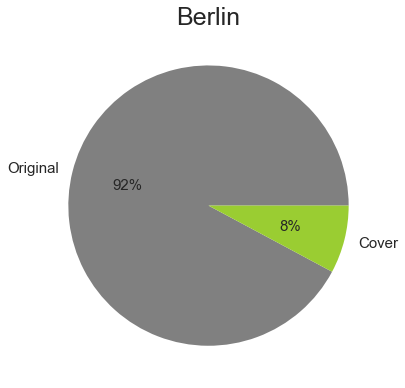

In [58]:
berlin = concat[concat['city']=='Berlin']
berlin['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Berlin',fontsize=25)
plt.tight_layout()

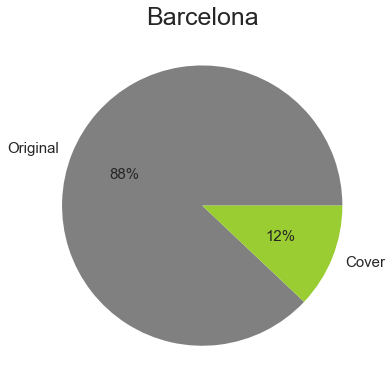

In [59]:
barcelona = concat[concat['city']=='Barcelona']
barcelona['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Barcelona',fontsize=25)
plt.tight_layout()

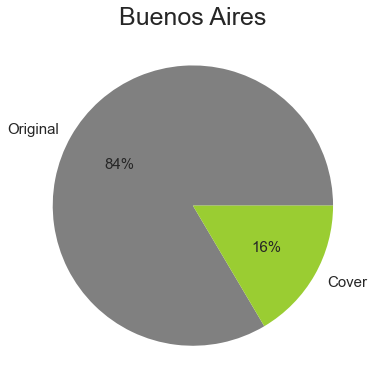

In [60]:
buenos_aires = concat[concat['city']=='Buenos Aires']
buenos_aires['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Buenos Aires',fontsize=25)
plt.tight_layout()

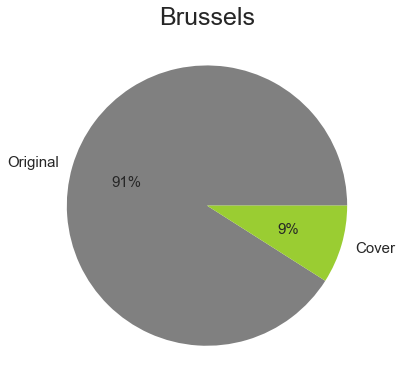

In [61]:
brussels = concat[concat['city']=='Brussels']
brussels['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Brussels',fontsize=25)
plt.tight_layout()

# Made a dataframe for just coverbands. Defined cover band as band with 100% cover in setlists and sets with more than 7 songs per set. 

In [62]:
test = concat[['ids','original_vs_cover']]
test['original']= np.where(test['original_vs_cover']=='Original', 1, 0)
test['cover']=np.where(test['original_vs_cover']=='Cover', 1, 0)
test.head()

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_17896\2336032035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['original']= np.where(test['original_vs_cover']=='Original', 1, 0)
C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_17896\2336032035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cover']=np.where(test['original_vs_cover']=='Cover', 1, 0)


,ids,original_vs_cover,original,cover
0,63bc928f,Original,1,0
1,63bc928f,Original,1,0
2,53bcb7fd,Original,1,0
3,53bcb7fd,Original,1,0
4,53bcb7fd,Original,1,0


In [63]:
grouped_setlists =test.groupby('ids')[('cover', 'original')].sum()
grouped_setlists['total songs']=grouped_setlists['cover']+grouped_setlists['original']
grouped_setlists['perc_cover']=grouped_setlists['cover']/grouped_setlists['total songs']
grouped_setlists.head()

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_17896\2130570596.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_setlists =test.groupby('ids')[('cover', 'original')].sum()


,cover,original,total songs,perc_cover
ids,,,,
3897507,0,13,13,0.0
7389960,0,12,12,0.0
13881559,0,5,5,0.0
13881579,0,7,7,0.0
13883975,0,5,5,0.0


In [107]:
coverbands = grouped_setlists[grouped_setlists['perc_cover']==1]
original_bands = grouped_setlists[grouped_setlists['perc_cover']<1]


In [108]:
coverbands = coverbands[coverbands['cover']>7]
coverbands_setlists=coverbands.reset_index()
coverband_setlist_id_list = coverbands_setlists['ids'].tolist()

list = coverband_setlist_id_list

coverband_df = concat[concat[concat.columns[0]].isin(list)]

Text(0.5, 1.0, 'TOP 10 COVER BANDS')

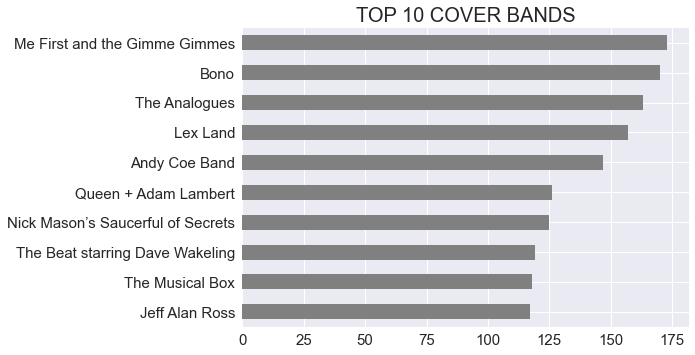

In [67]:
coverband_df['artist'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', color='grey',fontsize=15)

plt.title('TOP 10 COVER BANDS',fontsize=20)

In [68]:
non_us_coverbands= coverband_df[coverband_df['country']!='United States']
us_coverbands= coverband_df[coverband_df['country']=='United States']

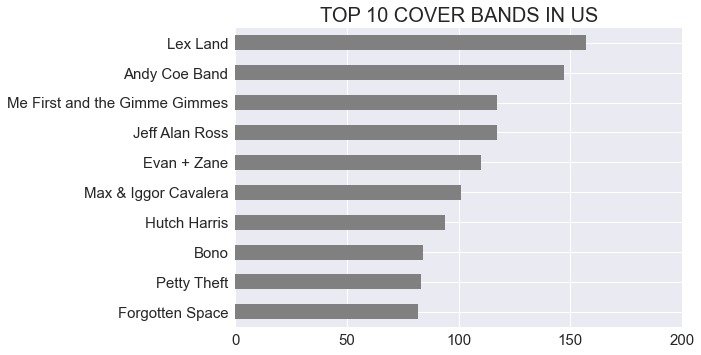

In [109]:
us_coverbands['artist'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', fontsize=15,color='grey')

plt.title('TOP 10 COVER BANDS IN US',fontsize=20)

plt.xticks(tick_val)
tick_val = [0,50,100,150,200]

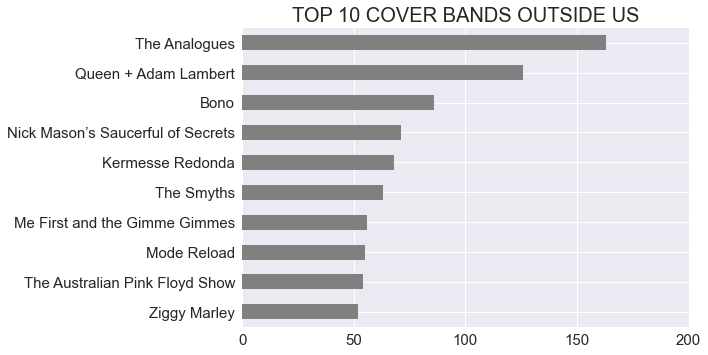

In [70]:
non_us_coverbands['artist'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', color='grey',fontsize=15)

plt.title('TOP 10 COVER BANDS OUTSIDE US',fontsize=20)
plt.xticks(tick_val)
tick_val = [0,50,100,150,200]

In [71]:
coverband_df['US_vs_non_US'] = np.where(coverband_df['country']=='United States', 'US', 'Non-US')
coverband_df_1= coverband_df[['ids','artist', 'US_vs_non_US']]

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_17896\469889125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverband_df['US_vs_non_US'] = np.where(coverband_df['country']=='United States', 'US', 'Non-US')


Text(0.5, 1.0, 'LOCATIONS OF COVER BANDS')

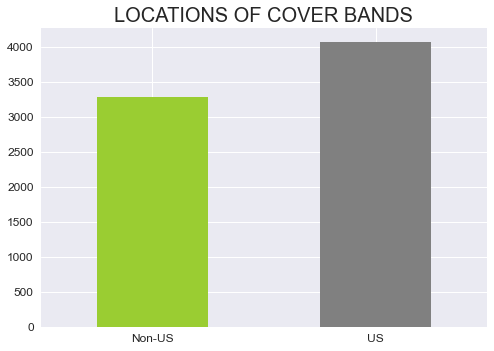

In [72]:
coverband_df.groupby('US_vs_non_US').size().plot(kind='bar', color=('yellowgreen', 'grey'),xlabel='', rot=0,legend=False, ylabel='', fontsize=12)

plt.title('LOCATIONS OF COVER BANDS',fontsize=20)

In [102]:
df_1 = concat[['ids','country', 'original_vs_cover']]
df_1['US_vs_non_US'] = np.where(df_1['country']=='United States', 'US', 'Non-US')
df_1[['ids','US_vs_non_US', 'original_vs_cover']]

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_17896\395752084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['US_vs_non_US'] = np.where(df_1['country']=='United States', 'US', 'Non-US')


,ids,US_vs_non_US,original_vs_cover
0,63bc928f,US,Original
1,63bc928f,US,Original
2,53bcb7fd,US,Original
3,53bcb7fd,US,Original
4,53bcb7fd,US,Original
...,...,...,...
324828,2b88444e,Non-US,Original
324829,2b88444e,Non-US,Original
324830,2b88444e,Non-US,Original
324831,b887582,Non-US,Original


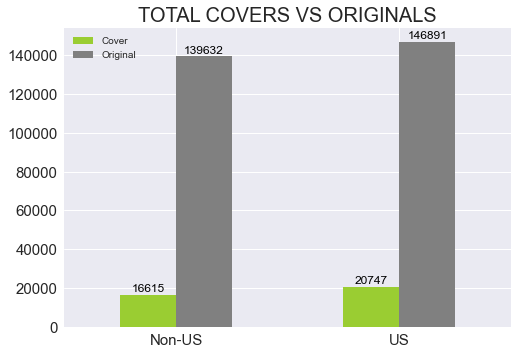

In [75]:
ax =df_1.groupby(['US_vs_non_US','original_vs_cover']).size().unstack('original_vs_cover').plot(kind='bar', color=('yellowgreen', 'grey'),xlabel='', legend=True, ylabel='', fontsize=15, rot=0)

plt.title('TOTAL COVERS VS ORIGINALS',fontsize=20)
for container in ax.containers:
    ax.bar_label(container, padding = 1,color='black', fontsize=12)
    

plt.legend(title='')
    
plt.show()    


In [106]:
df_1[['ids','US_vs_non_US', 'original_vs_cover']]
df_1_grouped = df_1.groupby(['US_vs_non_US','original_vs_cover']).count()
df_1_grouped['Percent_Original'] = df_1_grouped.groupby('US_vs_non_US')['ids'].transform(lambda x: x / x.sum() * 100)
df_1_grouped = df_1_grouped.reset_index()
df_2 = df_1_grouped[['US_vs_non_US', 'original_vs_cover', 'Percent_Original']]
df_2.head()

,US_vs_non_US,original_vs_cover,Percent_Original
0,Non-US,Cover,10.633804
1,Non-US,Original,89.366196
2,US,Cover,12.376072
3,US,Original,87.623928


In [97]:
df_3 = pd.DataFrame({'US_vs_non_US': ['Non-US', 'US'], 'Cover': [11, 12], 'Original': [89,88]})
df_3

,US_vs_non_US,Cover,Original
0,Non-US,11,89
1,US,12,88


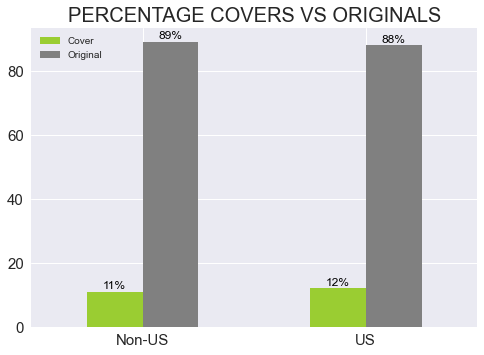

In [98]:
ax_1 = df_3.head().plot(kind='bar', x='US_vs_non_US', rot=0, color=('yellowgreen', 'grey'), fontsize=15, xlabel='')
plt.title('PERCENTAGE COVERS VS ORIGINALS',fontsize=20)

for p in ax_1.containers:
    ax_1.bar_label(p, fmt='%.0f%%', label_type='edge', color='black',padding=1, fontsize=12)

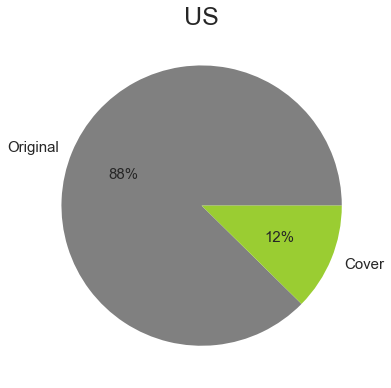

In [100]:
us['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=False, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('US',fontsize=25)
plt.tight_layout()
                        

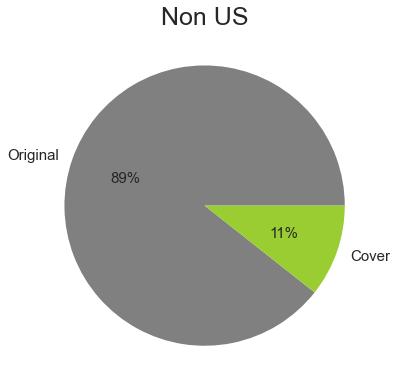

In [101]:
non_us['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=False, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Non US',fontsize=25)
plt.tight_layout()
                        